1. Understand the Aim:

Problem Statement: Public health policy depends on understanding COVID-19 data trends.

Objective: Analyze global COVID-19 data to visualize trends and compare countries.



2. Initial Dataset Exploration

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('D:\Sem_6\RISE\owid-covid-data.csv')

In [3]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,05-01-2020,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,06-01-2020,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,07-01-2020,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,08-01-2020,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,09-01-2020,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

In [5]:
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())


Shape: (429435, 67)
Columns: ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vac

In [7]:
# Check for Missing Values
df.isnull().sum().sort_values(ascending=False).head(15)


weekly_icu_admissions_per_million          418442
weekly_icu_admissions                      418442
excess_mortality_cumulative_per_million    416024
excess_mortality                           416024
excess_mortality_cumulative                416024
excess_mortality_cumulative_absolute       416024
weekly_hosp_admissions_per_million         404938
weekly_hosp_admissions                     404938
icu_patients                               390319
icu_patients_per_million                   390319
hosp_patients_per_million                  388779
hosp_patients                              388779
total_boosters_per_hundred                 375835
total_boosters                             375835
new_vaccinations                           358464
dtype: int64

In [10]:
# Convert date Column to DateTime Format
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

In [11]:
# Filter for Relevant Columns
columns = ['location', 'date', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'population']
df = df[columns]

In [13]:
# Drop Aggregated Regions (like “World” or “Africa”)
df = df[~df['location'].isin(['World', 'Africa', 'Asia', 'Europe', 'European Union', 'International', 'North America', 'Oceania', 'South America'])]


In [14]:
# Select a Few Countries for Comparison
countries = ['India', 'United States', 'Brazil', 'Germany', 'South Africa']
df_countries = df[df['location'].isin(countries)]


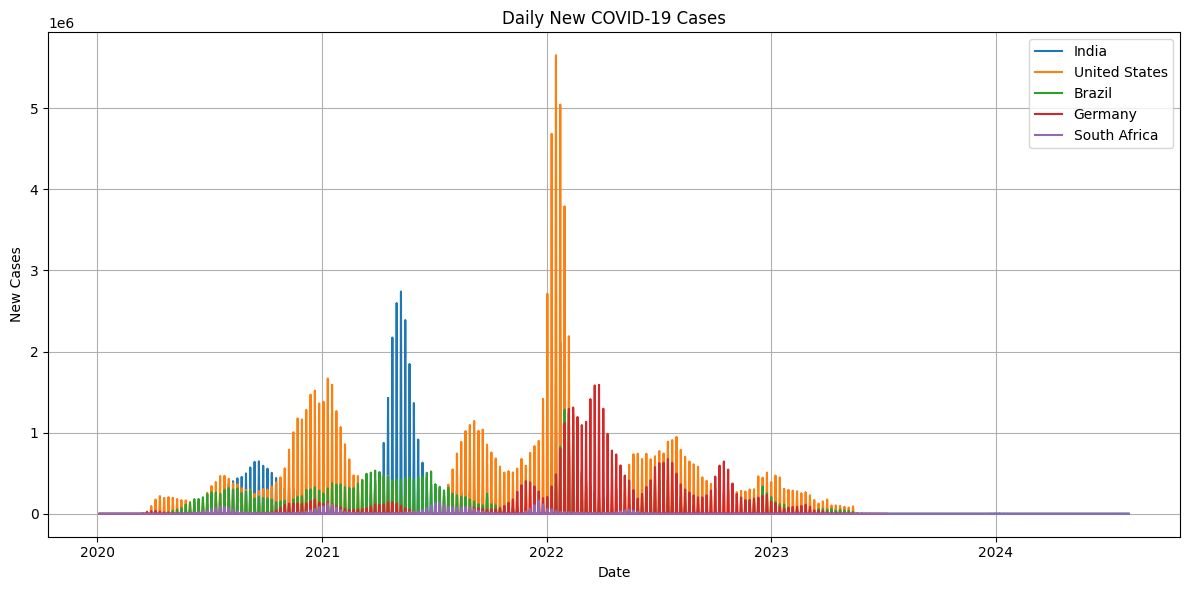

In [16]:
# Plot Basic Trend – Daily Cases
plt.figure(figsize=(12,6))
for country in countries:
    country_df = df_countries[df_countries['location'] == country]
    plt.plot(country_df['date'], country_df['new_cases'], label=country)

plt.title('Daily New COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


3. Handling Missing Values (NaNs)

In [17]:
# Check Nulls Again (for selected countries only):
df_countries.isnull().sum()



location          0
date              0
total_cases       8
new_cases       842
total_deaths      8
new_deaths      400
population        0
dtype: int64

In [18]:
# Fill missing new cases and deaths with 0
df_countries['new_cases'] = df_countries['new_cases'].fillna(0)
df_countries['new_deaths'] = df_countries['new_deaths'].fillna(0)

# Forward fill cumulative totals (per country)
df_countries.sort_values(['location', 'date'], inplace=True)
df_countries['total_cases'] = df_countries.groupby('location')['total_cases'].ffill()
df_countries['total_deaths'] = df_countries.groupby('location')['total_deaths'].ffill()


C:\Users\VATSAL\AppData\Local\Temp\ipykernel_26748\1416439004.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_countries['new_cases'] = df_countries['new_cases'].fillna(0)
C:\Users\VATSAL\AppData\Local\Temp\ipykernel_26748\1416439004.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_countries['new_deaths'] = df_countries['new_deaths'].fillna(0)
C:\Users\VATSAL\AppData\Local\Temp\ipykernel_26748\1416439004.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

3.2 Feature Engineering

In [21]:
# Now we create some new informative columns:

# 🔸 3.2.1 Case Fatality Rate (CFR)
df_countries['cfr'] = (df_countries['total_deaths'] / df_countries['total_cases']) * 100
df_countries['cfr'] = df_countries['cfr'].fillna(0)


C:\Users\VATSAL\AppData\Local\Temp\ipykernel_26748\1883919895.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_countries['cfr'] = (df_countries['total_deaths'] / df_countries['total_cases']) * 100
C:\Users\VATSAL\AppData\Local\Temp\ipykernel_26748\1883919895.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_countries['cfr'] = df_countries['cfr'].fillna(0)


🔸 3.2.2 Monthly Column (for aggregations or heatmaps)

In [22]:
df_countries['month'] = df_countries['date'].dt.to_period('M')


C:\Users\VATSAL\AppData\Local\Temp\ipykernel_26748\2735067838.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_countries['month'] = df_countries['date'].dt.to_period('M')


 3.2.3 Rolling Average (optional, for smooth trends)

In [23]:
df_countries['new_cases_7d_avg'] = df_countries.groupby('location')['new_cases'].transform(lambda x: x.rolling(7).mean())


C:\Users\VATSAL\AppData\Local\Temp\ipykernel_26748\3616521264.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_countries['new_cases_7d_avg'] = df_countries.groupby('location')['new_cases'].transform(lambda x: x.rolling(7).mean())


In [25]:
df.isnull().sum()

location            0
date                0
total_cases     17594
new_cases       19239
total_deaths    17594
new_deaths      18790
population          0
dtype: int64

In [26]:
df['new_cases'] = df['new_cases'].fillna(0)
df['new_deaths'] = df['new_deaths'].fillna(0)
df['total_cases'] = df.groupby('location')['total_cases'].ffill()
df['total_deaths'] = df.groupby('location')['total_deaths'].ffill()

In [27]:
df.isnull().sum()

location            0
date                0
total_cases     16526
new_cases           0
total_deaths    16526
new_deaths          0
population          0
dtype: int64

EDA (Exploratory Data Analysis)

In [32]:
# Data Structure & Quality
print(df.shape)
print(df.dtypes)
print(df['location'].nunique(), "unique countries")
print(df['date'].min(), "to", df['date'].max())
print(df.isnull().mean().sort_values(ascending=False))  # % missing
print(df.duplicated().sum(), "duplicate rows")

(417680, 7)
location                object
date            datetime64[ns]
total_cases            float64
new_cases              float64
total_deaths           float64
new_deaths             float64
population               int64
dtype: object
248 unique countries
2020-01-01 00:00:00 to 2024-08-14 00:00:00
total_cases     0.039566
total_deaths    0.039566
location        0.000000
date            0.000000
new_cases       0.000000
new_deaths      0.000000
population      0.000000
dtype: float64
129 duplicate rows


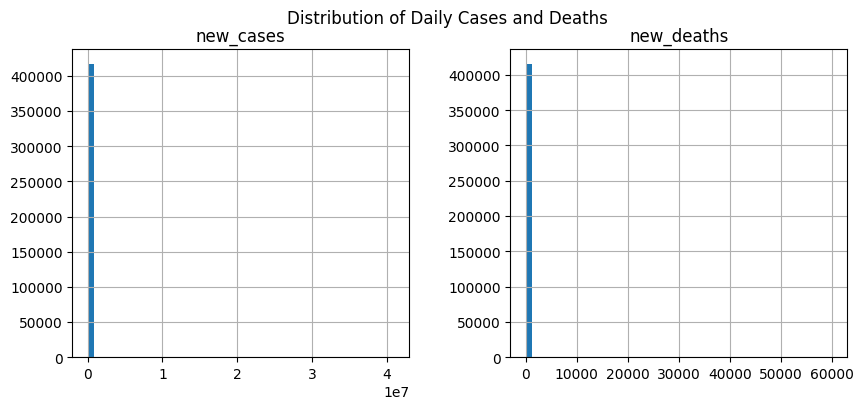

In [33]:
# Univariate Analysis
df[['new_cases', 'new_deaths']].hist(bins=50, figsize=(10,4))
plt.suptitle('Distribution of Daily Cases and Deaths')
plt.show()

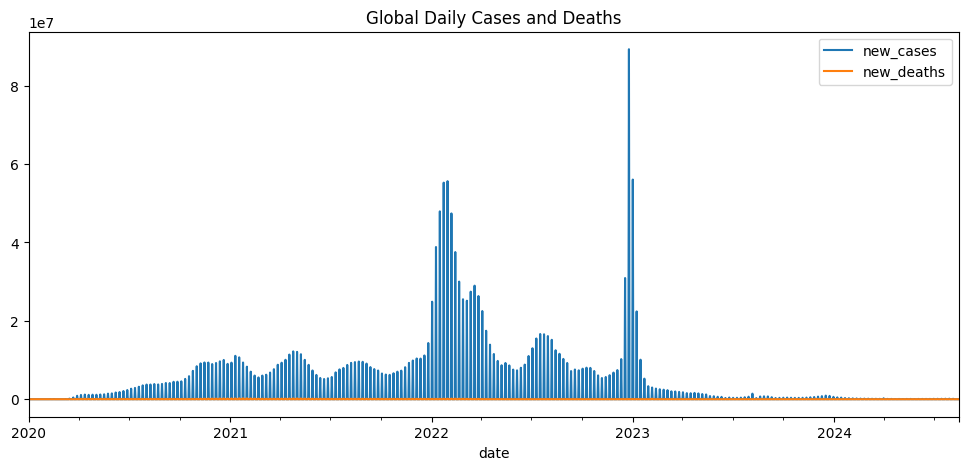

In [34]:
# Time Series Overview
global_trend = df.groupby('date')[['new_cases', 'new_deaths']].sum()
global_trend.plot(figsize=(12,5), title='Global Daily Cases and Deaths')
plt.show()

In [35]:
# Country-Level Insights
top_countries = df.groupby('location')['total_cases'].max().sort_values(ascending=False).head(10)
print("Top 10 countries by total cases:\n", top_countries)

Top 10 countries by total cases:
 location
High-income countries            429044049.0
Upper-middle-income countries    251753518.0
European Union (27)              185822587.0
United States                    103436829.0
China                             99373219.0
Lower-middle-income countries     91954400.0
India                             45041748.0
France                            38997490.0
Germany                           38437756.0
Brazil                            37511921.0
Name: total_cases, dtype: float64


In [36]:
# Per Capita Analysis
df['cases_per_million'] = df['total_cases'] / (df['population'] / 1_000_000)
top_per_million = df.groupby('location')['cases_per_million'].max().sort_values(ascending=False).head(10)
print("Top 10 countries by cases per million:\n", top_per_million)

Top 10 countries by cases per million:
 location
Cyprus           777237.231406
Brunei           774435.303184
San Marino       750727.218759
Austria          680392.012320
South Korea      667207.061598
Faroe Islands    652484.138788
Slovenia         639944.561932
Gibraltar        628882.700370
Martinique       626793.138727
Luxembourg       607692.082007
Name: cases_per_million, dtype: float64


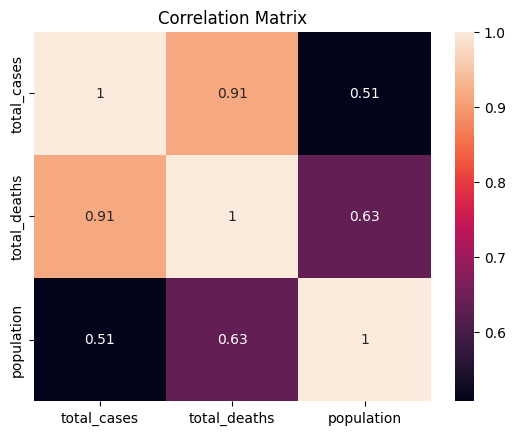

In [37]:
# Correlation
corr = df[['total_cases', 'total_deaths', 'population']].corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [38]:
# Advanced: First/Last Case Dates
first_cases = df[df['total_cases'] > 0].groupby('location')['date'].min()
print("First reported case date per country:\n", first_cases.head())

First reported case date per country:
 location
Afghanistan      2020-03-01
Albania          2020-03-15
Algeria          2020-03-01
American Samoa   2021-09-19
Andorra          2020-03-08
Name: date, dtype: datetime64[ns]


C:\Users\VATSAL\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
23:04:17 - cmdstanpy - INFO - Chain [1] start processing
23:04:17 - cmdstanpy - INFO - Chain [1] done processing


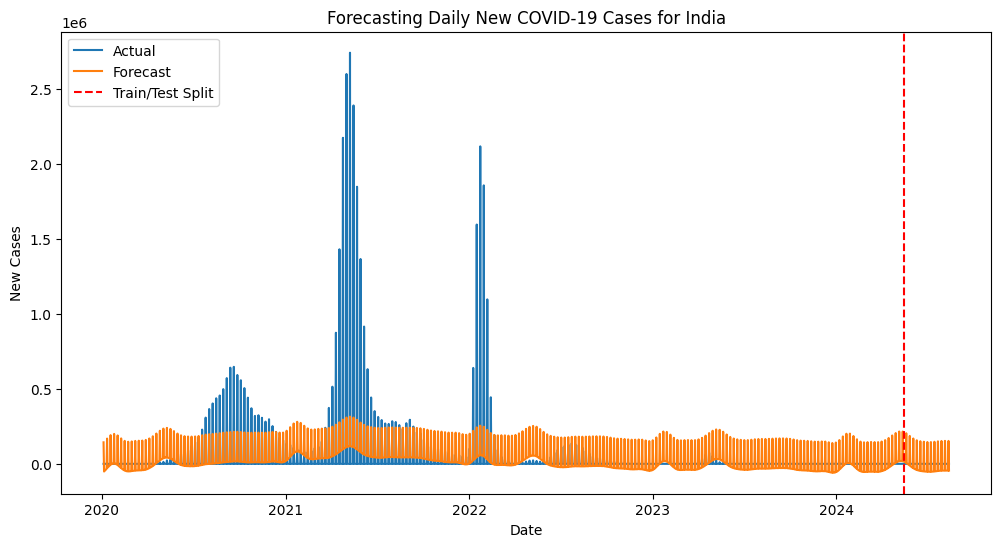

MAE: 56796.95, RMSE: 72096.07


In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# 2. Prepare the data for a selected country
country = 'India'
df_country = df[df['location'] == country][['date', 'new_cases']].copy()
df_country = df_country.set_index('date').asfreq('D').fillna(0).reset_index()
df_country.rename(columns={'date': 'ds', 'new_cases': 'y'}, inplace=True)

# 3. Train-test split (last 90 days as test)
train = df_country.iloc[:-90]
test = df_country.iloc[-90:]

# 4. Fit Prophet model
model = Prophet(daily_seasonality=True)
model.fit(train)

# 5. Forecast
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

# 6. Plot forecast
plt.figure(figsize=(12,6))
plt.plot(df_country['ds'], df_country['y'], label='Actual')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast')
plt.axvline(test['ds'].iloc[0], color='red', linestyle='--', label='Train/Test Split')
plt.title(f'Forecasting Daily New COVID-19 Cases for {country}')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.show()

# 7. Evaluate
y_true = test['y'].values
y_pred = forecast.set_index('ds').loc[test['ds'], 'yhat'].values
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(f'MAE: {mae:.2f}, RMSE: {rmse:.2f}')

ARIMA Modeling for COVID-19 Case Forecasting

C:\Users\VATSAL\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\VATSAL\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\VATSAL\AppData\Roaming\Python\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


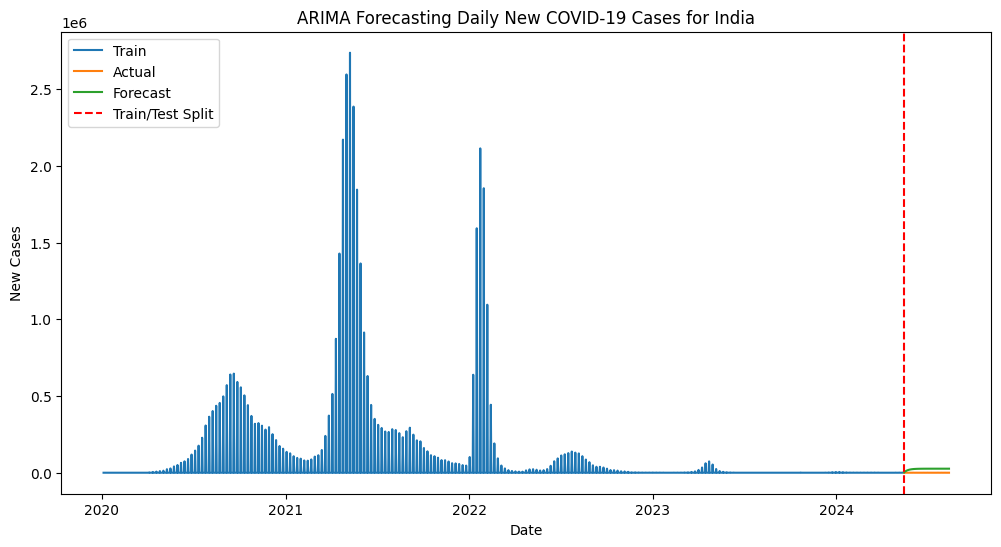

ARIMA MAE: 24075.07, RMSE: 24537.06


In [46]:
# 1. Install the required library if not already installed
# !pip install statsmodels

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# 2. Prepare the data for a selected country
country = 'India'
df_country = df[df['location'] == country][['date', 'new_cases']].copy()
df_country = df_country.set_index('date').asfreq('D').fillna(0)

# 3. Train-test split (last 90 days as test)
train = df_country.iloc[:-90]
test = df_country.iloc[-90:]

# 4. Fit ARIMA model (order can be tuned; (2,1,2) is a common starting point)
model = ARIMA(train['new_cases'], order=(2,1,2))
model_fit = model.fit()

# 5. Forecast
forecast = model_fit.forecast(steps=90)
forecast = pd.Series(forecast, index=test.index)

# 6. Plot forecast
plt.figure(figsize=(12,6))
plt.plot(train.index, train['new_cases'], label='Train')
plt.plot(test.index, test['new_cases'], label='Actual')
plt.plot(forecast.index, forecast, label='Forecast')
plt.axvline(test.index[0], color='red', linestyle='--', label='Train/Test Split')
plt.title(f'ARIMA Forecasting Daily New COVID-19 Cases for {country}')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.show()

# 7. Evaluate
mae = mean_absolute_error(test['new_cases'], forecast)
rmse = np.sqrt(mean_squared_error(test['new_cases'], forecast))
print(f'ARIMA MAE: {mae:.2f}, RMSE: {rmse:.2f}')

## **Actionable Insights & Policy Recommendations**

### 1. **Monitor and Respond to Case Surges**
- **Insight:** Peaks in daily new cases often precede increases in hospitalizations and deaths.
- **Recommendation:** Implement early warning systems and rapid response measures (e.g., temporary restrictions, increased testing) when a surge is detected.

### 2. **Targeted Vaccination Campaigns**
- **Insight:** Some countries/regions have lower vaccination rates and higher case/death rates.
- **Recommendation:** Prioritize vaccine distribution and public awareness campaigns in under-vaccinated or high-risk areas.

### 3. **Healthcare Resource Allocation**
- **Insight:** Spikes in cases can overwhelm healthcare systems, especially in countries with fewer hospital beds per capita.
- **Recommendation:** Increase healthcare capacity (beds, staff, equipment) in anticipation of predicted waves, especially in vulnerable regions.

### 4. **Public Health Messaging**
- **Insight:** Case fatality rates (CFR) and new case trends can inform the public about ongoing risks.
- **Recommendation:** Maintain transparent, data-driven communication to encourage continued adherence to preventive measures (masking, distancing) during high-risk periods.

### 5. **Data-Driven Policy Adjustments**
- **Insight:** Trends vary by country and over time; a one-size-fits-all approach is ineffective.
- **Recommendation:** Use real-time data to tailor interventions (lockdowns, school closures, travel restrictions) to local conditions.

### 6. **Focus on High-Risk Populations**
- **Insight:** Older populations and those with comorbidities have higher mortality rates.
- **Recommendation:** Protect high-risk groups through targeted measures (booster shots, prioritized care, special advisories).

### 7. **Continuous Data Collection and Analysis**
- **Insight:** Timely, accurate data is crucial for effective response.
- **Recommendation:** Invest in robust data infrastructure and encourage international data sharing for better global coordination.

---

**Summary:**  
By leveraging data-driven insights, policymakers can implement targeted, timely, and effective interventions to reduce COVID-19 transmission, minimize deaths, and optimize resource use. Continuous monitoring and flexible, localized responses are key to managing current and future public health crises.

---